# Housing Price Prediction 

**California 1990 data**

*Visit our home page for detailed solutions and other related DataScience services*

[www.totallogs.com]("WelcomeHome")

In [462]:
import sys
## major=3, minor=9, micro=13, releaselevel='final', serial=0
assert sys.version_info == (3,9,13, 'final', 0)

## execute with '?' added in front of a function to get its help.
sys.version_info?

Type:        version_info
String form: sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
Length:      5
Docstring:  
sys.version_info

Version information as a named tuple.


In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

housing = pd.read_csv("../Datasets/housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [464]:
#housing.plot(kind='scatter', x='longitude', y='latitude', color='b')
px.scatter(housing, x='longitude', y='latitude', hover_name='ocean_proximity', color='median_house_value')

In [465]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [466]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [467]:
print(type(housing["ocean_proximity"]))
print("\nNumber of unique values for Ocean_proximity :")
print(len(housing["ocean_proximity"].unique()))
print("\nAnd the Value counts are :")
print(housing["ocean_proximity"].value_counts())

<class 'pandas.core.series.Series'>

Number of unique values for Ocean_proximity :
5

And the Value counts are :
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


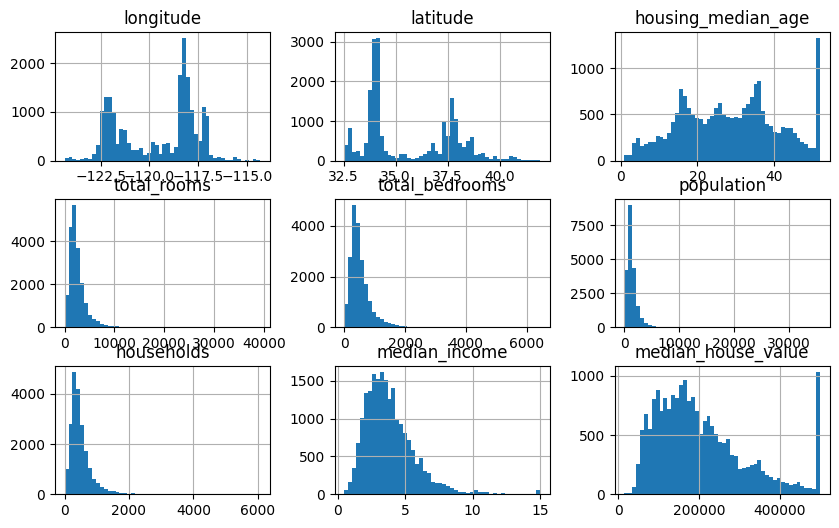

In [468]:
housing.hist(bins=50, figsize=(10, 6))
plt.show()

* Should be interesting to see if train_set and test_set have the same distribution of the features and predictor column.

In [469]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [470]:
# convert continuous data 'median_income' into categorical data 'income_cat'
# Think: Do we not loose meaningful information due to this conversion?
housing["income_cat"] = pd.cut(housing["median_income"], 
                                bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1,2,3,4,5]) 
cat_array = housing["income_cat"].value_counts()
cat_array

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

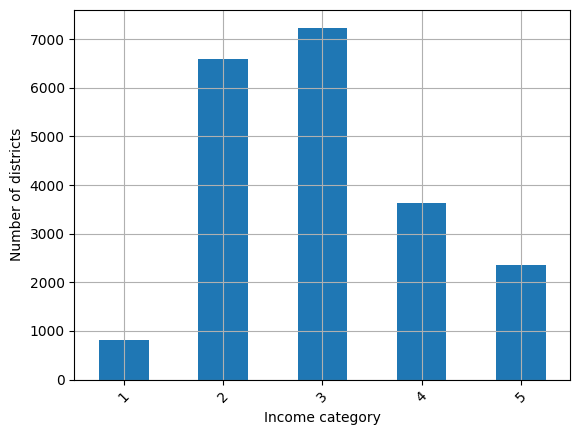

In [471]:
# rot : Rotation for ticks (xticks for vertical, yticks for horizontal plots).
housing["income_cat"].value_counts().sort_index().plot.bar(rot=45, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [472]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
print(strat_train_set["income_cat"].value_counts() / strat_train_set.shape[0])

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64


In [473]:
# Notice the split is in the same ratio of the categorical representations in the data
# A.K.A : Stratified sampling
print("Initial Dataset distribution : " )  
print(housing["income_cat"].value_counts() / housing.shape[0])


print(strat_train_set["income_cat"].value_counts() / strat_train_set.shape[0])
print(strat_test_set["income_cat"].value_counts() / strat_test_set.shape[0])

Initial Dataset distribution : 
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [474]:
for dset in (strat_train_set, strat_test_set):
    dset.drop('income_cat', axis=1, inplace=True)

In [475]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


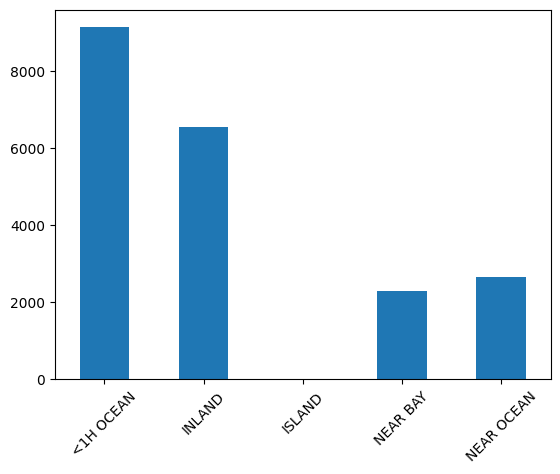

In [476]:
housing["ocean_proximity"].value_counts().sort_index().plot(kind='bar', rot=45)
plt.show()

In [477]:
housing = strat_train_set.copy()

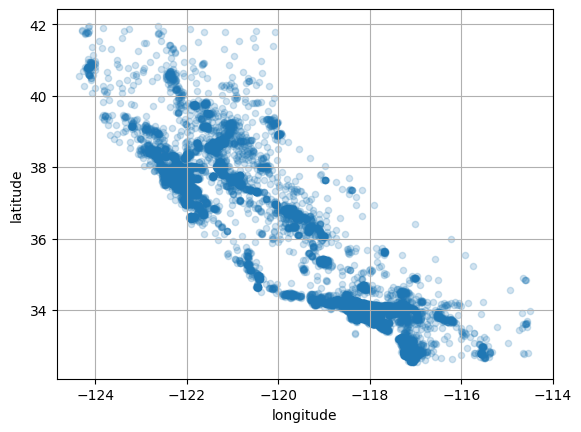

In [478]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2) 
plt.show()

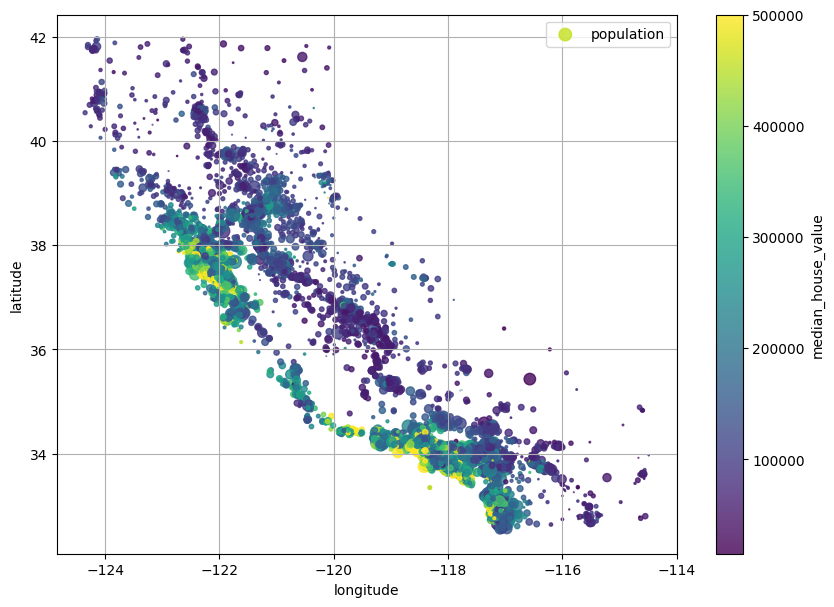

In [479]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True, alpha=0.8,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()


In [480]:
corr_coff = housing.corr(numeric_only=True)
corr_coff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


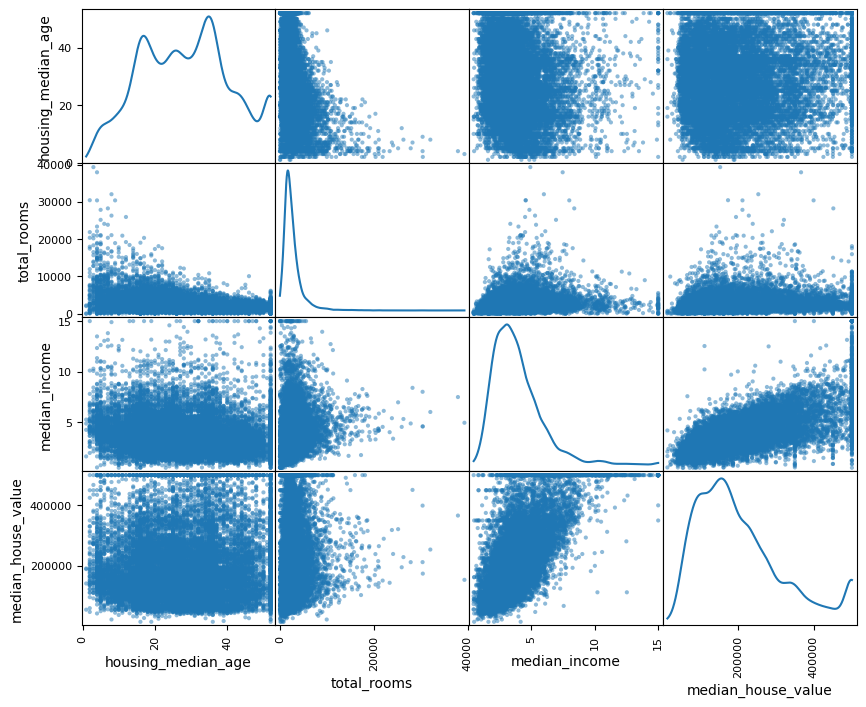

In [481]:
from pandas.plotting import scatter_matrix
features = ["housing_median_age", "total_rooms", "median_income", "median_house_value"]
scatter_matrix(housing[features], figsize=(10,8), diagonal='kde')
plt.show()

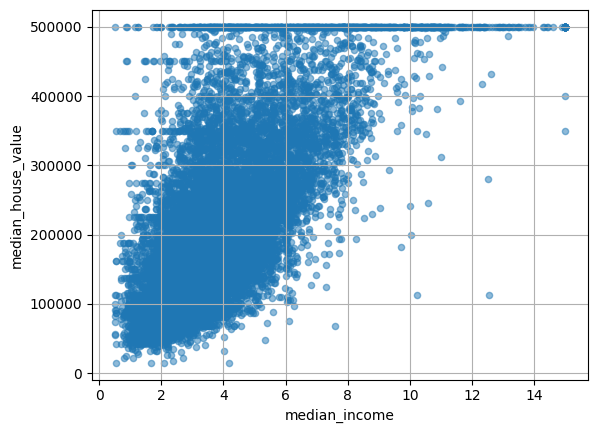

In [482]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, grid=True)
plt.show()

In [483]:
# combining features to have meaningful features
# this understanding comes from the domain knowledge
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [484]:
# get the correlations again
# looks like top 6 features can be considered meaningful for our purpose
corr_coff = housing.corr( numeric_only=True)
corr_coff['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
bedrooms_ratio        0.256397
rooms_per_house       0.143663
latitude              0.139584
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
longitude             0.050859
people_per_house      0.038224
population            0.020153
Name: median_house_value, dtype: float64

In [485]:
housing = strat_train_set.drop(['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [486]:
# housing.dropna(how='any', inplace=True)
# housing_labels = housing_labels[housing.index].copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [490]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [488]:
print(imputer.statistics_)
X = imputer.transform(housing_num)
X


[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])